# Programming for Data Science and Artificial Intelligence

## 5. Regression

Regression is a supervised algorithm to make prediction based on continous y values.   If your y has discrete values, that would be classification.  Simplest example is linear regression, 
$$y = ax + b$$, 
i.e., simply fitting a straight line to data, but such models can be extended to model more complicated data behavior.

Let's take a easy look on a simple example:

### Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

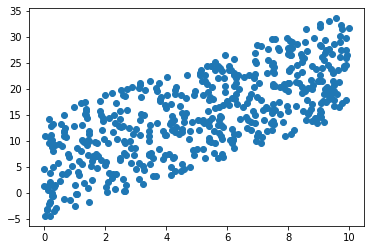

In [2]:
#let's create a scatter points with a = 2 and b = -5
rng = np.random.RandomState(1)
x = 10 * rng.rand(500)   #500 numbers between 0 and 10
y = 2*x - 5 + 20 * rng.rand(500)  #lets add some noise between 0 and 1

plt.scatter(x, y)

Text(1, 24, 'adjusted $r^2$ = 0.495')

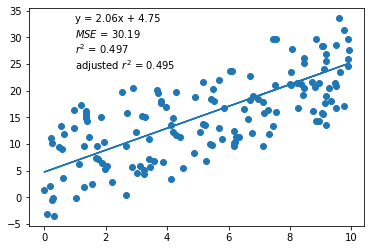

In [3]:
#let's create a model to fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.model_selection as model_selection

#make sure our X can be inputted into sklearn
X = x[:, np.newaxis]

#generate Xtrain, Xtest, ytrain, ytest
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                X, y, test_size = 0.3, random_state=99)

model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)  #plot the fitted line
plt.text(1, 33, f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

#measure variance of residuals, or non-fit
#$(1/n)sigma(y - f(x))^2) where SSE = sigma(y-f(x))^2
plt.text(1, 30, f"$MSE$ = {mean_squared_error(y_test, y_pred):.2f}")

#measures goodness of fit
#1 - SSE/TSS  where TSS = sigma(y-ymean)^2
#r^2 can be negative, when fit without an intercept
#We ALMOST never fit without the intercept unless
#you are sure your data comes through the origin (0, 0), e.g., height, width, but NOT house value!
#r^2 upper bound is 1, lower bound can be anything
plt.text(1, 27, f"$r^2$ = {r2_score(y_test, y_pred):.3f}")

#calculate adjusted rsquare
#take IV into consideration, to balance out possible overfitting
#increases only if new predictor (x) enhances the model
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_rsqrt = 1-(1-r2_score(y_test, y_pred))*(n-1)/(n-p-1)
plt.text(1, 24, f"adjusted $r^2$ = {adjusted_rsqrt:.3f}")

### Polynomial Regression

Limitation of simple linear regression comes when we have non-linear data.  We can simply counter polynomial regression.  For example, a degree-1 polynomial fits a straight line to the data like this: 

$$y = ax + b$$  

A degree-3 polynomial fits a cubic curve to the data 

$$y = ax^3 + bx^2 + cx + d$$

In scikit learn, we can implement this using a polynomial preprocessor which translate data into its polynomials.

For example, if our x is 

<code>x = np.array([1, 2, 3, 4, 5])</code>

If we perform polynomial transformation like this:

<code>poly_X = PolynomialFeatures(degree = 3).fit_transform(X)</code>
    
X2 will look like this:

<code>[[ 1, 1, 1]
 [ 2, 4, 8]
 [ 3, 9, 27]
 [ 4, 16, 64]
 [ 5, 25, 125]]</code>
 
 Now our new feature_engineered X has one column representing x, second column representing $x^2$, and third column representing $x^3$.  Now the y becomes 
 
 $$ y = ax^3 + bx^2 + cx $$ 
 
You may wonder where is d.  d is simply the noise happening when we fit the model with the given x.   Another point you have to be aware is that **this is NOT a non-linear model**.  It remains a linear model as the weights (a, b, c) associated with the features are still linear.  $x^2$ is simply a feature.   However, the curve that we are fitting is polynomial in nature.

Now let's look at some example:

===Performing polynomial regression with deg:  1 ======
Coeff:  [ 0.         -0.95004935]
r^2 = 0.518
MSE = 45.82
adjusted $r^2$ = 0.517
===Performing polynomial regression with deg:  3 ======
Coeff:  [ 0.00000000e+00 -3.86559278e+00  1.48738477e-01 -2.00386767e-03]
r^2 = 0.669
MSE = 31.50
adjusted $r^2$ = 0.668
===Performing polynomial regression with deg:  5 ======
Coeff:  [ 0.00000000e+00 -1.19911168e+01  1.27281826e+00 -6.82738394e-02
  1.72606825e-03 -1.63199416e-05]
r^2 = 0.696
MSE = 28.86
adjusted $r^2$ = 0.696


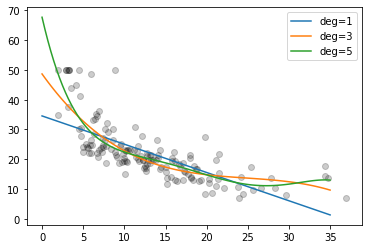

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()

# #for getting some info
# print(boston.keys())
# print('\n')
# print(boston.data.shape)
# print('\n')
# print(boston.feature_names)
# print(boston.DESCR)

X = boston.data[:, 12][:, np.newaxis]  #% lower status of the population
y = boston.target

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.3, random_state=5)

#let's try to fit the model using 1, 3, 5 degrees....
for ix, deg in enumerate([1, 3, 5]):
    print("===Performing polynomial regression with deg: ", deg, "======")
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X_test)
    
    #plotting smooth curve by creating lots of x1
    #we can also plot X_test against y_pred, but since X_test is not 
    #continuous, graph would look a bit ugly
    X_plot = np.linspace(0, 35, 100)[:, np.newaxis]
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, label=f'deg={deg}')
    
    print("Coeff: ", model.named_steps['linearregression'].coef_)
    print(f"r^2 = {r2_score(y_test, y_pred):.3f}")
    print(f"MSE = {mean_squared_error(y_test, y_pred):.2f}")
    n, p = X.shape[0], X.shape[1]
    adjusted_rsqrt = 1-(1-r2_score(y_test, y_pred))*(n-1)/(n-p-1)
    print(f"adjusted $r^2$ = {adjusted_rsqrt:.3f}")

#plot y actual to compare with the three models
plt.scatter(X_test, y_test, color='black', alpha=0.2)

plt.legend(loc='best')

### Validation Curve

'\ntraining score is typically ALWAYS higher than validation score; \nvalidation score reaches a maximum around 6, before\ndropping off as the model becomes over-fit\nThus, the best tradeoff between bias and variance\nis at 6th order of polynomials\n\nOne rule of thumb: Validation score matters more than training score!\n'

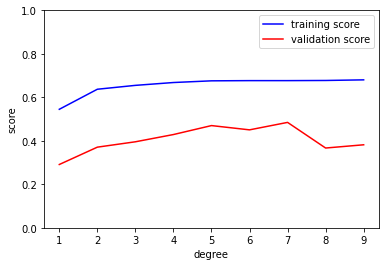

In [5]:
#a good following question to ask is which model provides
#a good tradeoff between bias (underfitting) and variance (over-fitting)?
#we can use validation curve

from sklearn.model_selection import validation_curve

degree = np.arange(1, 10)
model = make_pipeline(PolynomialFeatures(), LinearRegression())

#to get the available params, do PolynomialFeatures().get_params().keys()
#for param_name, type print(model), append them with __
#read more here --> https://scikit-learn.org/stable/modules/compose.html#pipeline
train_score, val_score = validation_curve(model, X, y,
                    param_name="polynomialfeatures__degree", param_range=degree,
                                         cv=7)

#train_score is a list of 7 scores for each degree
#thus train_score shape is (21, 7), thus you cannot
#simply plot them..likely you want to plot the median or mean

#median across all columns
plt.plot(degree, np.median(train_score, axis=1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, axis=1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

'''
training score is typically ALWAYS higher than validation score; 
validation score reaches a maximum around 6, before
dropping off as the model becomes over-fit
Thus, the best tradeoff between bias and variance
is at 6th order of polynomials

One rule of thumb: Validation score matters more than training score!
'''

### Learning curve

There is also one important thing, i.e., scalability

Some rules:
1. A model will generally overfit a small dataset.  This mean the training score will be high, while the validation score is low
2. A model will generally underfit a large dataset; this means that the training score will decrease, but the validation score will increase
3. A validation score will always be worse than training score
Thus, one aspect we want know here is how do we know that we have enough data, such that adding more data will not improve the validation score anymore?  **Answer: Learning curves**

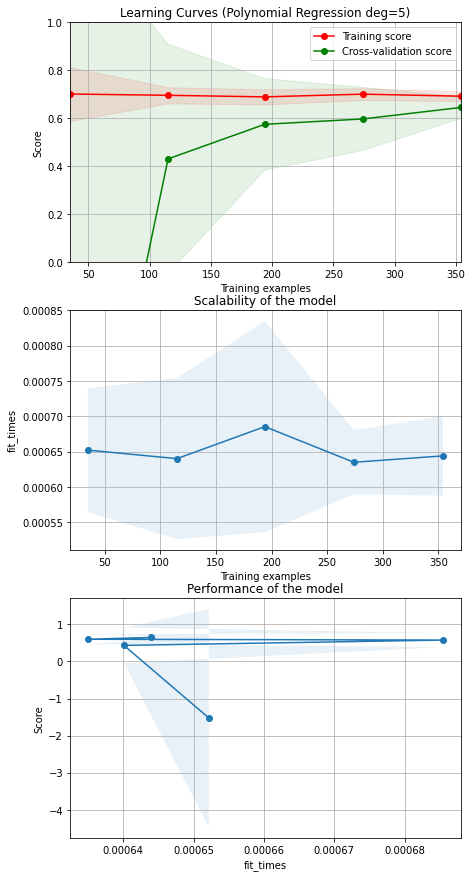

In [6]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    cv = ShuffleSplit(n_splits = 10, test_size = 0.3, random_state=42)

    #fit_times in seconds
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=1, return_times=True)

    #perform some simple stats
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    _, ax = plt.subplots(3, 1, figsize=(7, 15))

    #plot learning curve
    ax[0].grid()
    ax[0].set_title("Learning Curves (Polynomial Regression deg=5)")
    ax[0].plot(train_sizes, train_scores_mean, 'o-', color='r',
              label="Training score")
    ax[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1, color='r')
    ax[0].plot(train_sizes, test_scores_mean, 'o-', color='g',
              label="Cross-validation score")
    ax[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color='g')
    ax[0].legend(loc="best")
    ax[0].set_ylim(0, 1)
    ax[0].set_xlim(train_sizes[0], train_sizes[-1])
    ax[0].set_xlabel("Training examples")
    ax[0].set_ylabel("Score")

    #plot n_samples vs fit_times
    ax[1].grid()
    ax[1].set_title("Scalability of the model")
    ax[1].plot(train_sizes, fit_times_mean, 'o-')
    ax[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                             fit_times_mean + fit_times_std, alpha=0.1)
    ax[1].set_xlabel("Training examples")
    ax[1].set_ylabel("fit_times")

    #plot fit_time vs score
    ax[2].grid()
    ax[2].plot(fit_times_mean, test_scores_mean, 'o-')
    ax[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    ax[2].set_xlabel("fit_times")
    ax[2].set_ylabel("Score")
    ax[2].set_title("Performance of the model")
    
estimator = make_pipeline(PolynomialFeatures(5), LinearRegression())
plot_learning_curve(estimator, X, y)


### Grid Search

Validation curve gives us intuition about overfitting.  Learning curve gives us idea about sample sizes.   Once we get an intuition which model is the best, we would want to explore all possible params of a model, and see which yield the best results.

For example, for our pipeline, these are the following params that can be configured:
    polynomial features - degree (0...21)
    linearregression - normalize (True, False)
Of course, we can manually write for loops, but that is inefficient.  Sklearn implemented something called **Grid Search** which allows us to explore all possible parameters within one go, and return us the best model and the corresponding params.

Let's take a quick example:

In [12]:
from sklearn.model_selection import GridSearchCV

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning,
                        module="sklearn")

def plot_model(model, X, y, X_test, y_test, name,
              param_grid):
    #gridsearchcv takes in dict
    grid = GridSearchCV(model, param_grid, cv=7)

    #grid.fit will fit the model at each grid point
    grid.fit(X, y)

    #print the best parameters
    print("Best params: ", grid.best_params_)

    #we do not need to create a new estimator
    model = grid.best_estimator_

    model.fit(X, y)
    y_pred = model.predict(X_test)
    
    #plot the actual y
    plt.scatter(X_test, y_test, color='black', alpha=0.2)
    
    #plot a smooth curve of the model
    X_plot = np.linspace(0, 35, 100)[:, np.newaxis]
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot)
    
    #print the stats
    print("Coefficients: ", model.named_steps[name].coef_)
    print(f"r^2 = {r2_score(y_test, y_pred):.3f}")
    print(f"MSE = {mean_squared_error(y_test, y_pred):.2f}")
    n, p = X.shape[0], X.shape[1]
    adjusted_rsqrt = 1-(1-r2_score(y_test, y_pred))*(n-1)/(n-p-1)
    print(f"adjusted $r^2$ = {adjusted_rsqrt:.3f}")

param_grid = {'polynomialfeatures__degree': np.arange(1, 10),
              'linearregression__normalize': [True, False]}
model = make_pipeline(PolynomialFeatures(), LinearRegression())

plot_model(model, X, y, X_test, y_test, 
           'linearregression', param_grid)

ImportError: cannot import name 'ignore_warnings' from 'sklearn.utils' (/Users/chaklam/DSAI/Environments/teaching_env/lib/python3.7/site-packages/sklearn/utils/__init__.py)

### Regularization

Sklearn implements LinearRegression() using the Ordinary Least Squares closed form solver from scipy.   OLS is simply inverting and multiplicating some matrices.  

$$\mathbf{w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}$$

There are several properties of OLS:

1. Treating all predictors (x1...xn) equally, i.e., unbiased method
2. Goes for the best fit, no matter what (i.e., it prefers overfitting over underfitting, or in another words, it goes for highest variances and lowest bias possible)

As you can see, OLS biggest drawback is that it does not discriminate features (i.e., it does not have any feature selection mechanism.)   For example, if my x1 is height, x2 is arm_length, and x3 is hair_length, and my y is weight.  

We can clearly know that height can predict weight, but not hair length. Another problem is that x2 is actually correlated with x1, which is commonly known as multicollinearity problem!  In the case of OLS, it will try to find the best possible combination of coefficients to make error $y - f(x)$ smallest possible.  When I say coefficients, I am refering to a, b, c and d --> ax1 + bx2 + cx3 + d  (in case of a deg 1 linear equation).     

OLS may get a really good "training" result because height is a good predictor.  However, it produces two related problem:

1. **Multicollinearity** - which causes inaccurate estimates of coefficients, and thus lead to a problem where model becomes very sensitve to small changes
2. **Irrelevant features** - hair_length got into the equation and contaminates the model.

All will result in inaccurate model and overfitting.

The good question to ask is "is it possible to let OLS automatically remove hair_length or lower its coefficients if it found that it has no/less relationship to weight".  The answer is yes.

For multicollinearity, we use Ridge regression
For automatic feature selection, we use Lasso regression.
If we want both, we can use Elastic net regression

### Ridge regression ($L_2$ regularization)

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 

$$
Loss function = \sum (y - f(x))^2 + \alpha\sum_{n=1}^N \theta_n^2
$$

where $\alpha$ is a free parameter that controls the strength of the penalty.
This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator:



Best params:  {'polynomialfeatures__degree': 8, 'ridge__alpha': 0.0001}
Coefficients:  [ 0.00000000e+00 -4.86149886e+00  2.25808900e-01 -1.97087639e-03
 -1.11732554e-04 -2.29816006e-07  6.38885705e-08  1.40696331e-09
 -4.00316567e-11]
r^2 = 0.680
MSE = 30.43
adjusted $r^2$ = 0.679


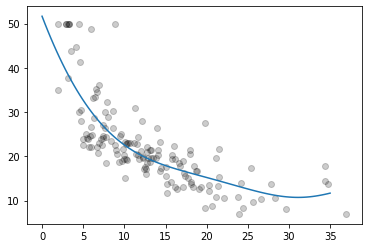

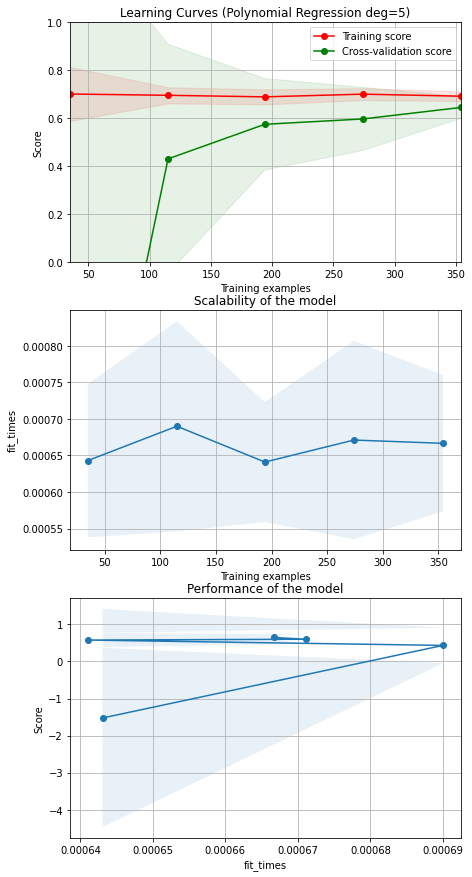

In [8]:
from sklearn.linear_model import Ridge
params_Ridge = {'polynomialfeatures__degree': np.arange(1, 10),
                'ridge__alpha': [0.1,0.01,0.001,0.0001]}
##I put normalize=True to reach convergence faster, since it is giving me warnings...as my x value have wide range
model = make_pipeline(PolynomialFeatures(), Ridge(normalize=True))   
plot_model(model, X, y, X_test, y_test, 'ridge', params_Ridge)
plot_learning_curve(model, X, y)

### Lasso regression ($L_1$ regularization)

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:


$$
Loss function = \sum (y - f(x))^2 + \alpha\sum_{n=1}^N |\theta_n|
$$

Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor *sparse models* where possible: that is, it preferentially sets model coefficients to exactly zero.

We can see this behavior in duplicating the ridge regression figure, but using L1-normalized coefficients:

Best params:  {'lasso__alpha': 0.0001, 'polynomialfeatures__degree': 6}
Coefficients:  [ 0.00000000e+00 -3.85948097e+00  1.48264707e-01 -1.26858095e-03
 -4.10373134e-05  0.00000000e+00  1.74025337e-08]
r^2 = 0.670
MSE = 31.37
adjusted $r^2$ = 0.669


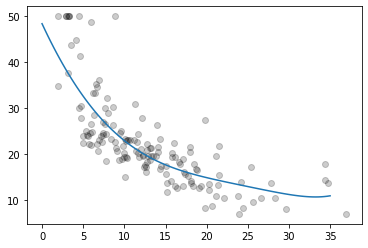

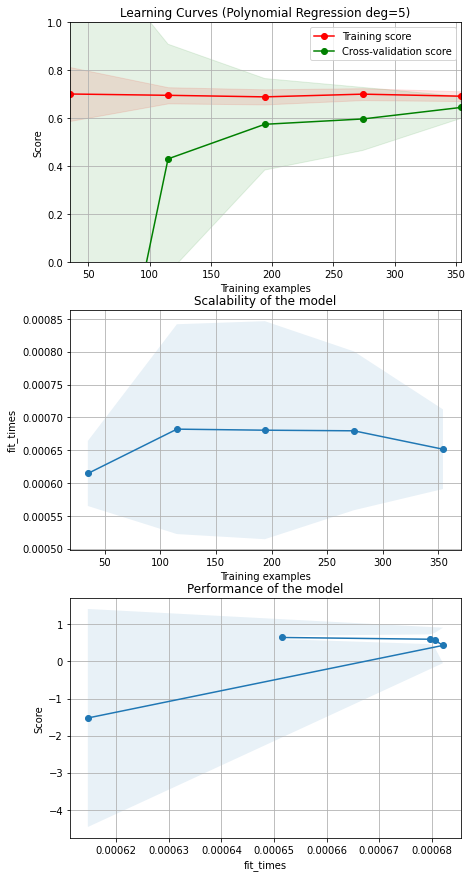

In [9]:
from sklearn.linear_model import Lasso
params_Lasso = {'polynomialfeatures__degree': np.arange(1, 10),
                'lasso__alpha': [1,0.1,0.01,0.001,0.0001]}

#put max_iter since it needs more time to reach convergence
model = make_pipeline(PolynomialFeatures(), 
                      Lasso(normalize=True, tol=0.01))
plot_model(model, X, y, X_test, y_test, 'lasso', params_Lasso)
plot_learning_curve(model, X, y)

### Elastic net 

Linear regression with combined L1 and L2 regularizer

$$
Loss function = \sum (y - f(x))^2 + \alpha\sum_{n=1}^N \theta_n^2 + \alpha\sum_{n=1}^N |\theta_n|
$$


Best params:  {'elasticnet__alpha': 0.0001, 'elasticnet__l1_ratio': 1.0, 'polynomialfeatures__degree': 6}
Coefficients:  [ 0.00000000e+00 -3.85948097e+00  1.48264707e-01 -1.26858095e-03
 -4.10373134e-05  0.00000000e+00  1.74025337e-08]
r^2 = 0.670
MSE = 31.37
adjusted $r^2$ = 0.669


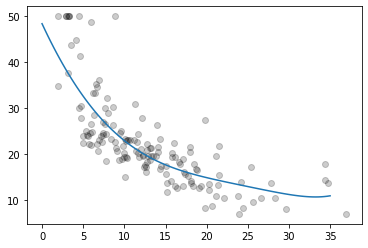

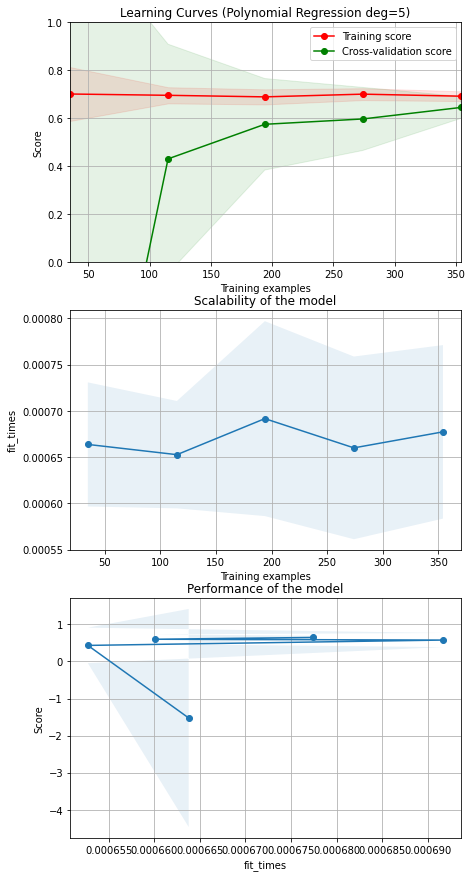

In [10]:
from sklearn.linear_model import ElasticNet
#i set tol to be low since it is eating my pc....
model = make_pipeline(PolynomialFeatures(), 
                      ElasticNet(normalize=True))
#l1_ratio = 0 the penalty is an L2 penalty. 
#For l1_ratio = 1 it is an L1 penalty. 
#For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.
params_Elasticnet = {'polynomialfeatures__degree': np.arange(1, 10),
                'elasticnet__alpha': [1,0.1,0.01,0.001,0.0001],
                "elasticnet__l1_ratio": np.linspace(0, 1, 5)}
plot_model(model, X, y, X_test, y_test, 'elasticnet', params_Elasticnet)
plot_learning_curve(model, X, y)

### Ridge or Lasso or Elastic net??

All these techniques should be almost always used, unless you are sure that all x has impact on y, and there are no collinear variables, since these techniques reduces overfitting and improve validation score.

How to choose is a little bit difficult. It is easier to understand the assumptions behind.
1.  Ridge assumes that coefficients are normally distributed.   Here, if we have collinear variables, it will equalize them thus reducing dominant effect over the model.   **In simple words, if you have many small/medium effect sized predictors, use Ridge.**
2. Lasso assumes that coefficients are Laplace distributed (in layman sense, it mean some predictors are very useful while some are completely irrelevant).   Here, Lasso has the ability to shrink coefficient to zero thus eliminate predictors that are not useful to the output, thus automatic feature selection.  **In simple words, if you have only very few predictors with medium/large effect, use Lasso.**
3.  Elastic basically is a compromise between the two, and thus take huge computation time to reach that compromise.  **If you have the resource to spare, you can use Elastic net**

In practice, if you have 1 billions row of data, you want to get a small sample, compare Lasso and Ridge with baseline. Of course, it is much better if you understand the underlying assumption of your data.  The error should give you an intuition which to use.

### Stochastic Gradient Descent

Most of above problem is either solve using a closed-form OLS matrix (i.e., inverting and multiplicating matrices)(e.g., sklearn LinearRegression or RidgeRegression) or treating the problem as a minimization problem and perform some sort of coordinate descent (e.g., sklearn Lasso, ElasticNet).

The main problem with normal gradient descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration.

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than normal Gradient Descent, instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.  

Therefore, the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is akin to *simulated annealing*, an algorithm inspired from the process of annealing in metallurgy where molten metal is slowly cooled down. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.




Best params:  {'polynomialfeatures__degree': 1, 'sgdregressor__alpha': 0.1, 'sgdregressor__l1_ratio': 0.5, 'sgdregressor__learning_rate': 'invscaling', 'sgdregressor__penalty': 'elasticnet'}
Coefficients:  [10.97643884 -1.08257386]
r^2 = 0.387
MSE = 58.28
adjusted $r^2$ = 0.386


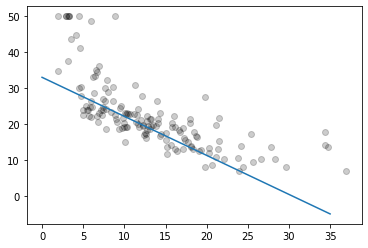

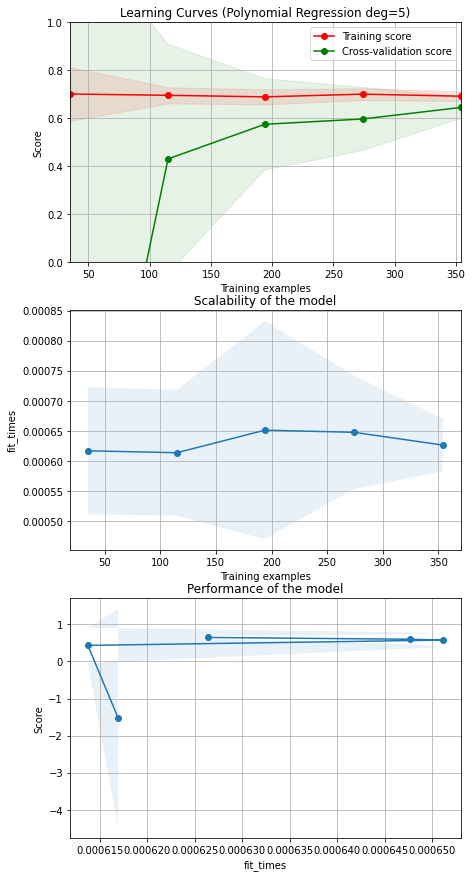

In [11]:
from sklearn.linear_model import SGDRegressor

model = make_pipeline(PolynomialFeatures(), 
                      SGDRegressor())

#l1_ratio = 0 the penalty is an L2 penalty. 
#For l1_ratio = 1 it is an L1 penalty. 
#For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.
params_SGD = {'polynomialfeatures__degree': np.arange(1, 10),
                'sgdregressor__alpha': [1,0.1,0.01,0.001,0.0001],
                'sgdregressor__penalty': ['l2', 'l1', 'elasticnet'],
                 'sgdregressor__l1_ratio': np.linspace(0, 1, 5),
              'sgdregressor__learning_rate': ['constant', 'optimal',
                                             'invscaling', 'adaptive']}
plot_model(model, X, y, X_test, y_test, 'sgdregressor', params_SGD)
plot_learning_curve(model, X, y)